In [2]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pf = pd.read_csv('unnati_phase1_data_revised.csv')
pf.dropna()
pf

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23


In [4]:

pf['Speed']=pd.to_numeric(pf['Speed'],errors='coerce')
pf['Long'] = pd.to_numeric(pf['Long'], errors='coerce')
pf['Lat'] = pd.to_numeric(pf['Lat'], errors='coerce')


In [5]:
try:
    pf['Date']=pd.to_datetime(pf['Date'])
except ValueError:
    print()
try:
    pf['Time']=pd.to_datetime(pf['Time'])
except ValueError:
    print()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_11416\1360187512.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pf['Time']=pd.to_datetime(pf['Time'])


In [6]:
try:
    avg_speed=pf['Speed'].mean()
except (TypeError, ValueError):
    print()

In [7]:
print(avg_speed)

38.40384525205158


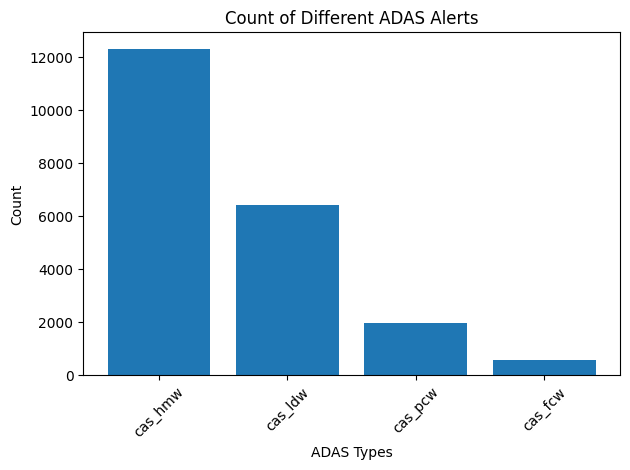

In [8]:
adas_count = pf['Alert'].value_counts()

plt.bar(adas_count.index, adas_count.values)
plt.xlabel('ADAS Types')
plt.ylabel('Count')
plt.title('Count of Different ADAS Alerts')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

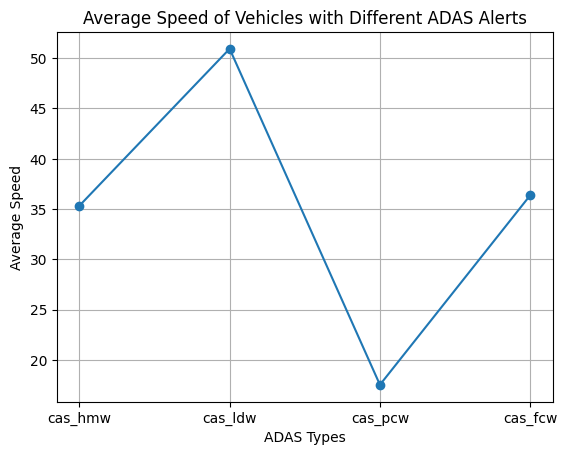

In [9]:
specific_adas=pf[pf['Alert']=='cas_hmw']
avg_speed_cas_hmw=specific_adas['Speed'].mean()
specific_adas=pf[pf['Alert']=='cas_ldw']
avg_speed_cas_ldw=specific_adas['Speed'].mean()
specific_adas=pf[pf['Alert']=='cas_pcw']
avg_speed_cas_pcw=specific_adas['Speed'].mean()
specific_adas=pf[pf['Alert']=='cas_fcw']
avg_speed_cas_fcw=specific_adas['Speed'].mean()
adas_types = ['cas_hmw', 'cas_ldw', 'cas_pcw', 'cas_fcw']
average_speeds = [avg_speed_cas_hmw, avg_speed_cas_ldw, avg_speed_cas_pcw, avg_speed_cas_fcw]

plt.plot(adas_types, average_speeds, marker='o')
plt.xlabel('ADAS Types')
plt.ylabel('Average Speed')
plt.title('Average Speed of Vehicles with Different ADAS Alerts')
plt.grid(True)
plt.show()

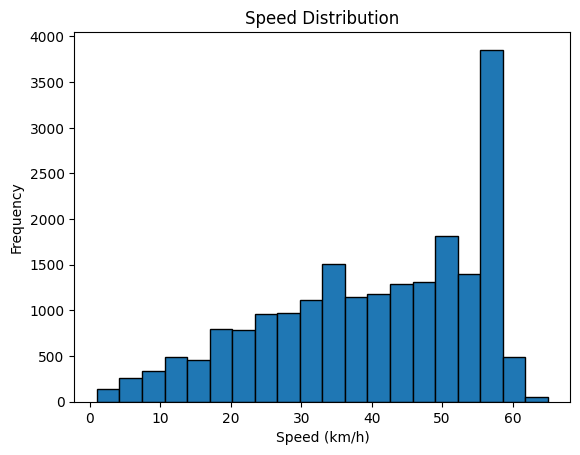

In [10]:
pf = pf[pf['Speed'] > 0]
pf = pf[pf['Speed'] > 0]
plt.hist(pf['Speed'], bins=20, edgecolor='black')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Speed Distribution')
plt.show()

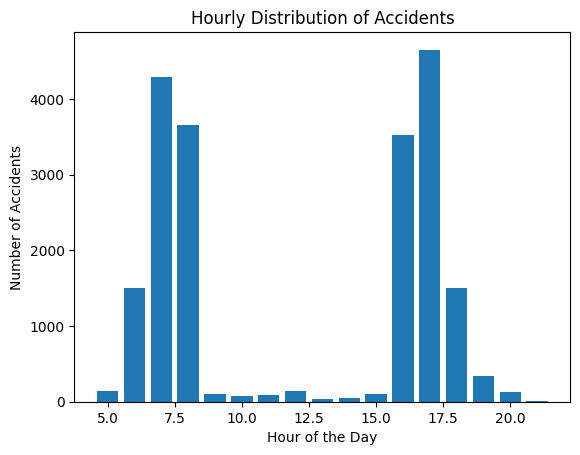

In [11]:
pf['hour'] = pf['Time'].dt.hour
hourly_accidents = pf.groupby('hour')['hour'].count()
accidents_by_time = pf.groupby(pf['Time'].dt.time)['Time'].count()
plt.bar(hourly_accidents.index, hourly_accidents.values)
plt.xlabel('Hour of the Day') 
plt.ylabel('Number of Accidents')
plt.title('Hourly Distribution of Accidents')
plt.show()

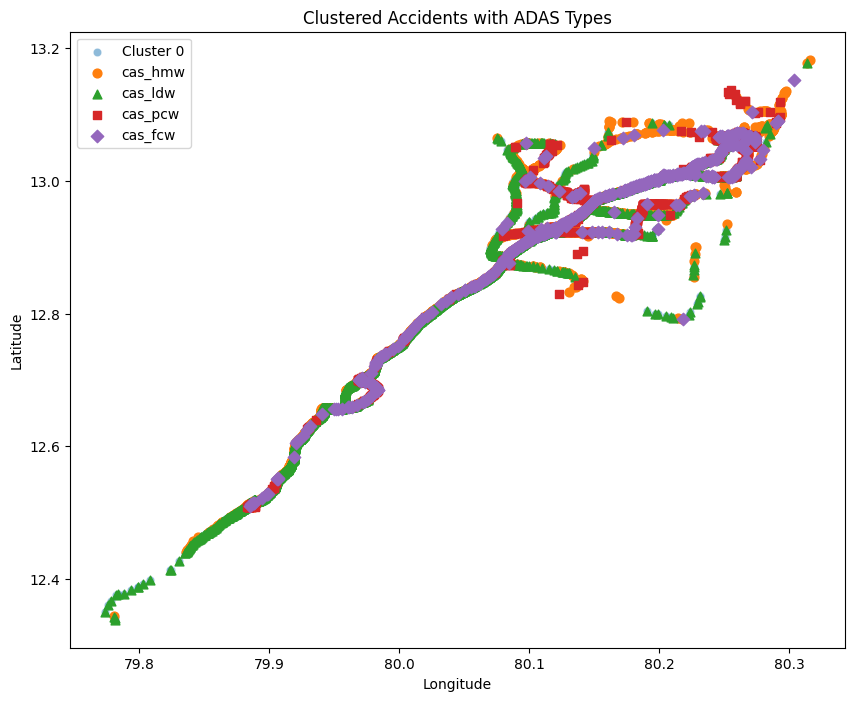

In [12]:
from sklearn.cluster import KMeans

clustering_data = pf[['Long', 'Lat']]
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)  # Set n_init explicitly
pf['cluster'] = kmeans.fit_predict(clustering_data)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_data = pf[pf['cluster'] == cluster]
    sns.scatterplot(x='Long', y='Lat', data=cluster_data, label=f'Cluster {cluster}', alpha=0.5)

adas_markers = {'cas_hmw': 'o', 'cas_ldw': '^', 'cas_pcw': 's', 'cas_fcw':'D' }
for adas_type, marker in adas_markers.items():
    adas_data = pf[pf['Alert'] == adas_type]
    plt.scatter(adas_data['Long'], adas_data['Lat'], label=adas_type, s=40, marker=marker)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Accidents with ADAS Types')
plt.legend()
plt.show()

In [19]:
import random
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess your dataset (assuming you have already done this)


# Feature selection - using 'Lat', 'Long', 'Speed' as features
features = ['Lat', 'Long', 'Speed']  # Add more features as needed

# Select features
X = pf[features]
y = pf['Alert']  # Assuming this is your target variable

# Train your RandomForestClassifier model (clf) using your dataset
clf = RandomForestClassifier()
clf.fit(X, y)

# Generate random values for the next two months
num_days_per_month = 30  # Adjust based on the actual number of days in the months
num_new_data_points = num_days_per_month * 2  # For two months
new_data = []

for _ in range(num_new_data_points):
    new_lat = random.uniform(X['Lat'].min(), X['Lat'].max())
    new_long = random.uniform(X['Long'].min(), X['Long'].max())
    new_speed = random.uniform(X['Speed'].min(), X['Speed'].max())

    new_data.append({'Lat': new_lat, 'Long': new_long, 'Speed': new_speed})

# Create DataFrame from generated new data
new_data_df = pd.DataFrame(new_data)

# Predict on the new data using your trained model (clf)
predictions = clf.predict(new_data_df)

# Create date ranges for the next two months
start_date = datetime.now() + timedelta(days=1)  # Start from tomorrow
end_date = start_date + timedelta(days=num_new_data_points - 1)  # For two months

date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame to store predictions with dates, longitude, and latitude
predictions_df = pd.DataFrame({'Date': date_range, 'Latitude': new_data_df['Lat'], 'Longitude': new_data_df['Long'], 'Speed': new_data_df['Speed'], 'Prediction': predictions})

print(predictions_df)
y_pred = clf.predict(X)  # Assuming 'clf' is your trained model



# Compare predicted values with actual values
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
matching_predictions = comparison_df[comparison_df['Actual'] == comparison_df['Predicted']]

# Print matching predictions
print("Matching Predictions:")
print(matching_predictions)
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy on actual dataset: {accuracy:.2f}')

                         Date   Latitude  Longitude      Speed Prediction
0  2023-08-30 10:00:50.745432  12.631349  80.180947  33.390413    cas_hmw
1  2023-08-31 10:00:50.745432  12.436724  80.226680  45.755693    cas_ldw
2  2023-09-01 10:00:50.745432  12.468147  80.199026  18.910378    cas_hmw
3  2023-09-02 10:00:50.745432  13.032137  80.081460  22.005177    cas_hmw
4  2023-09-03 10:00:50.745432  13.067074  80.282436  63.017930    cas_ldw
5  2023-09-04 10:00:50.745432  12.685597  80.218881  29.598701    cas_hmw
6  2023-09-05 10:00:50.745432  13.130270  79.849152  32.657941    cas_hmw
7  2023-09-06 10:00:50.745432  12.831038  80.191189  11.215742    cas_hmw
8  2023-09-07 10:00:50.745432  12.815557  80.255624  49.309425    cas_ldw
9  2023-09-08 10:00:50.745432  12.704355  80.106423  57.140332    cas_ldw
10 2023-09-09 10:00:50.745432  12.559270  79.872582  48.987949    cas_ldw
11 2023-09-10 10:00:50.745432  12.891490  80.289136   5.221464    cas_pcw
12 2023-09-11 10:00:50.745432  12.4658

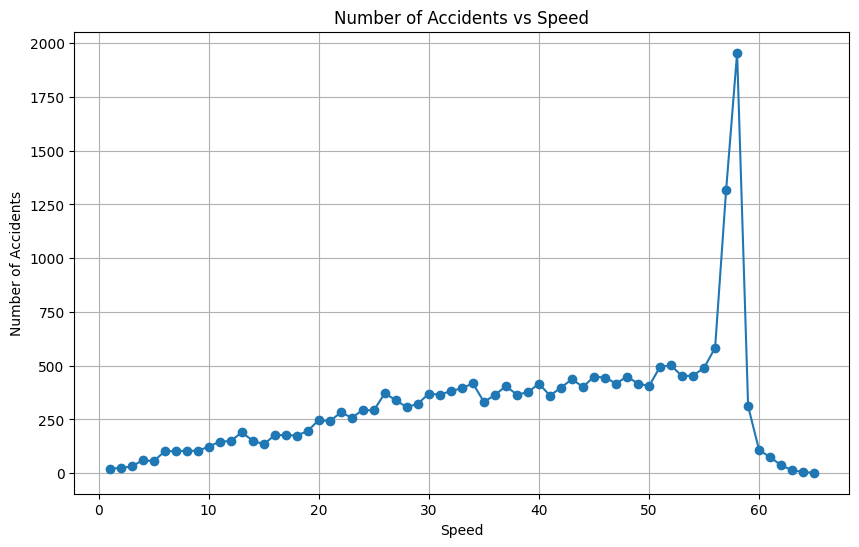

In [20]:
pf = pf[pf['Speed'] > 0]

accidents_by_speed = pf.groupby('Speed').size().reset_index(name='accident_count')

plt.figure(figsize=(10, 6))
plt.plot(accidents_by_speed['Speed'], accidents_by_speed['accident_count'], marker='o')
plt.xlabel('Speed')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents vs Speed')
plt.grid(True)
plt.show()

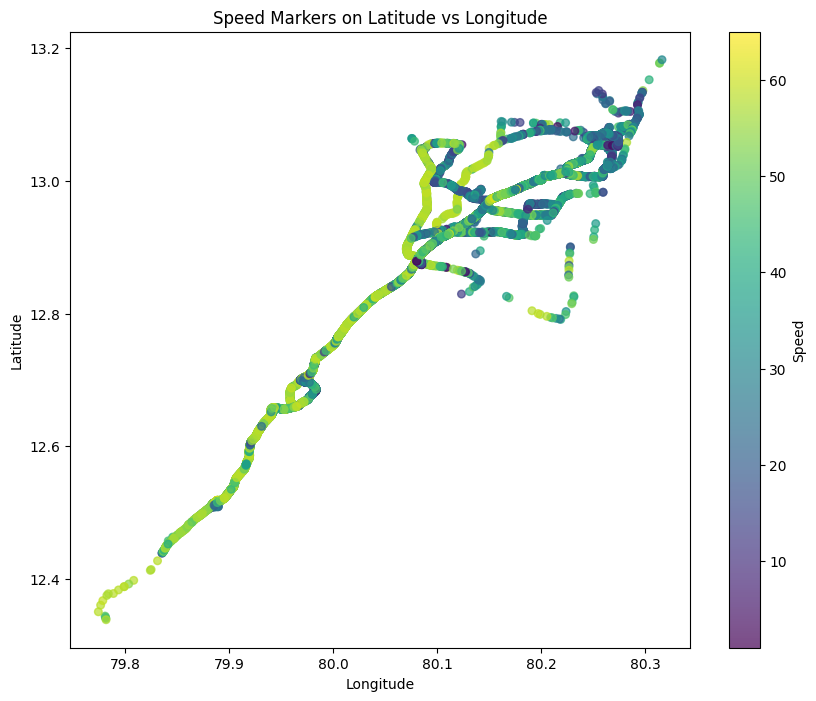

In [22]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract latitude, longitude, and speed columns
latitude = pf['Lat']
longitude = pf['Long']
speed = pf['Speed']

# Create a scatter plot with speed markers
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=speed, cmap='viridis', s=30, marker='o', alpha=0.7)

# Add colorbar for speed legend
cbar = plt.colorbar()
cbar.set_label('Speed')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Speed Markers on Latitude vs Longitude')

# Show the plot
plt.show()
